# Imports and Constants

In [1]:
import sys
# sys.path is a list of absolute path strings
sys.path.append('..')

import rhythm_regression.notebook_tools as nbt
import rhythm_regression.vector_processing as vp
from generate_sample_matchings import RANDOM_SEED

import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
with open( "../data/matchings/example_set.pickle", "rb" ) as f:
    example_set = np.array(pickle.load(f), dtype=object)
    for example in tqdm(example_set):
        vp.validate_matching(example['m'], example['t'], example['matchings'])

print(len(example_set))
parameter_table = pd.read_csv('../data/matchings/generated_data_params.csv', index_col=0)
parameter_table.index.name = 'example_id'
print(len(parameter_table))
parameter_table.head()

100%|██████████| 484000/484000 [00:26<00:00, 18518.72it/s]


484000
484000


,deletion_rate,insertion_rate,len_m,space_augmentation_rate,space_reduction_rate
example_id,,,,,
0,0.0,0.0,50,0.0,0.000
1,0.0,0.0,50,0.0,0.001
2,0.0,0.0,50,0.0,0.002
3,0.0,0.0,50,0.0,0.003
4,0.0,0.0,50,0.0,0.004


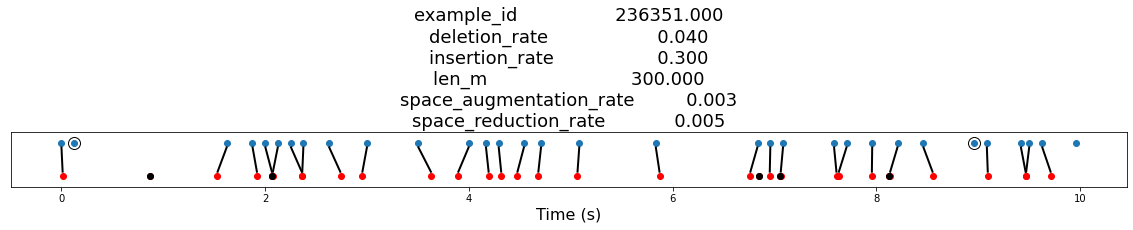

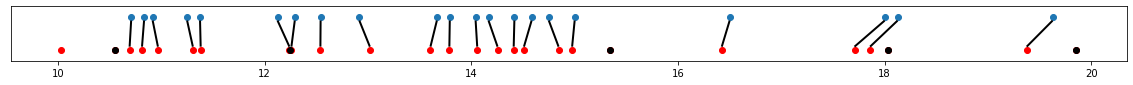

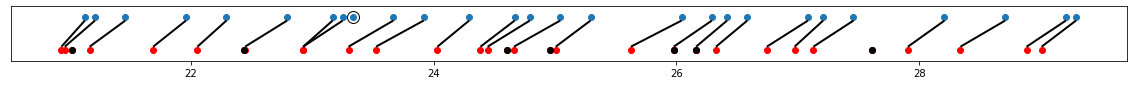

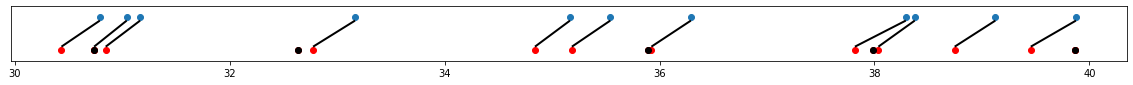

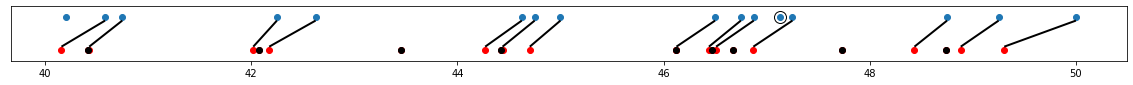

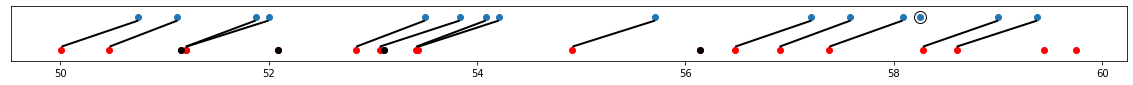

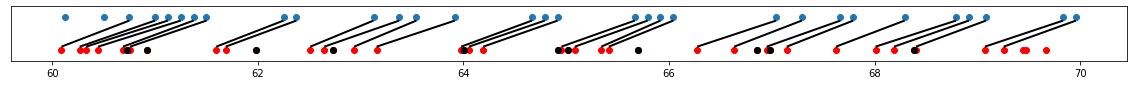

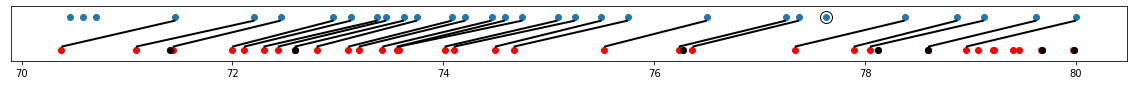

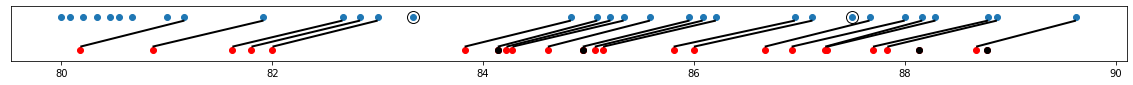

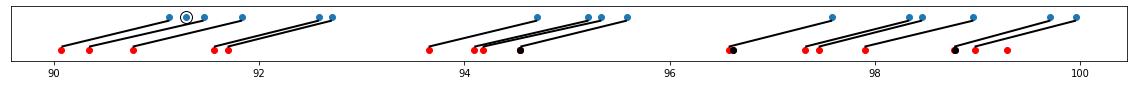

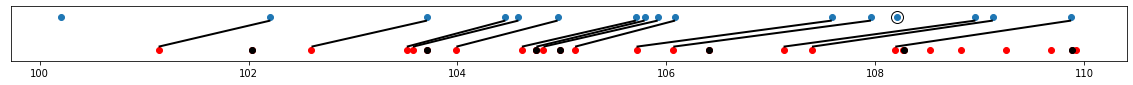

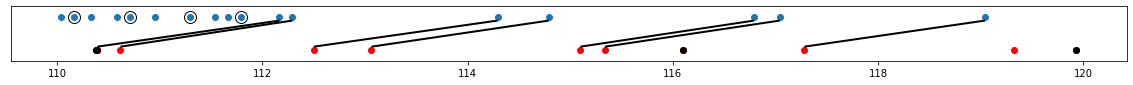

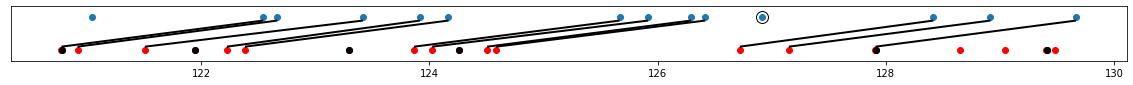

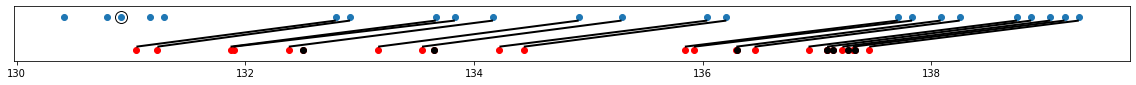

In [3]:
np.random.seed(RANDOM_SEED)
shuffle_permutation = np.random.permutation(len(example_set))
shuffled_example_set = example_set[shuffle_permutation]
shuffled_parameter_table = parameter_table.iloc[shuffle_permutation].reset_index(drop=False)


for i in range(1):
    params_row_str = str(shuffled_parameter_table.iloc[i])
    title = params_row_str[params_row_str[params_row_str.find('\n'): ].find('\n'): params_row_str.rfind('\n')]
    nbt.plot_matching_in_rows(shuffled_example_set[i]['m'], shuffled_example_set[i]['t'], shuffled_example_set[i]['matchings'], title)



In [4]:
np.diff(example_set[0]['m'])

array([0.16666667, 0.375     , 0.75      , 0.25      , 0.375     ,
       1.5       , 0.125     , 0.125     , 0.125     , 0.25      ,
       0.25      , 0.375     , 0.16666667, 0.125     , 0.125     ,
       0.125     , 0.375     , 0.375     , 0.125     , 0.75      ,
       0.125     , 0.125     , 0.33333333, 0.25      , 0.25      ,
       0.75      , 0.25      , 0.125     , 0.125     , 0.125     ,
       0.25      , 0.5       , 0.75      , 0.08333333, 0.5       ,
       0.33333333, 0.25      , 0.125     , 0.125     , 0.125     ,
       0.125     , 0.25      , 0.125     , 0.125     , 0.25      ,
       0.125     , 0.25      , 0.125     , 0.16666667])

In [5]:
np.diff(example_set[0]['t'])

array([8.17805207e-02, 3.73567147e-01, 8.36990445e-01, 2.56144659e-01,
       3.58922522e-01, 1.35293075e+00, 1.88489447e-01, 1.58234355e-01,
       1.32537749e-01, 2.01647496e-01, 2.89269872e-01, 3.19813589e-01,
       1.66088351e-01, 1.14409816e-01, 1.35087080e-01, 8.21351236e-02,
       3.60365906e-01, 4.55456708e-01, 1.33539340e-01, 7.03232212e-01,
       1.05752850e-01, 8.36595645e-02, 5.64505488e-01, 1.61376350e-01,
       2.13357016e-01, 6.42664807e-01, 3.68628239e-01, 1.24814799e-02,
       2.19845291e-01, 9.33296512e-02, 3.25273993e-01, 4.05301283e-01,
       7.36372550e-01, 2.40472953e-01, 4.09877332e-01, 3.40880229e-01,
       2.04651381e-01, 3.94894265e-02, 2.19760341e-01, 1.16453627e-01,
       7.99321832e-02, 3.37557819e-01, 2.82830002e-02, 2.32245717e-01,
       3.34008202e-01, 1.32571517e-04, 3.82628072e-01, 1.11703268e-01,
       1.44482060e-01])